In [3]:
# Importing required modules
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

plt.rcParams["figure.figsize"] = (15, 6)

# Reading the input dataset and looking at the data
From looking at the dataframe shape, We can see that the dataset contains 32 fields and 569 rows. Looking at the counts of each field from the dataframe description, we can see that certain fields such as :

- radius_mean
- area_mean

have missing values. From the description, we can also see that certains fields have very small values (concavity_mean, concavity_worst etc.), whereas some other fields have relatively large values (area_mean, perimeter_worst etc.). We will have to scale these values to prevent dominance of these features in the model.

In [4]:
df = pd.read_csv("data.txt")
print("Dataset dimensions: {}".format(df.shape))
df.head()

Dataset dimensions: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_sd                  float64
texture_sd                 float64
perimeter_sd               float64
area_sd                    float64
smoothness_sd              float64
compactness_sd             float64
concavity_sd               float64
concave_points_sd          float64
symmetry_sd                float64
fractal_dimension_sd       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,541.000000,569.000000,569.000000,528.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.175410,19.289649,91.969033,659.519697,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.527352,4.301036,24.298981,351.435482,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.740000,16.170000,75.170000,420.875000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.400000,18.840000,86.240000,555.900000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,16.020000,21.800000,104.100000,798.050000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


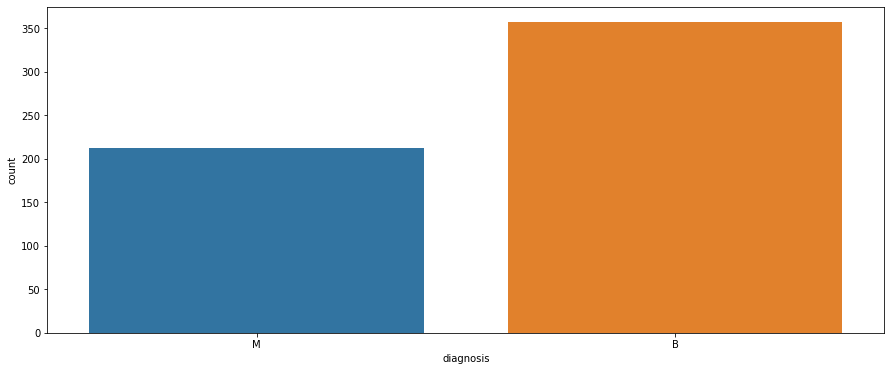

In [7]:
sns.countplot(x="diagnosis", data=df);

We can see that there are more records for Benign diagnosis than Maignant diagnosis. This is a slightly imbalanced dataset.

In [8]:
for i in df.columns:
    n_miss = df[i].isnull().sum()
    perc = (n_miss / df.shape[0]) * 100
    print("Missing in {}: {} ({}%)".format(i, n_miss, perc))

Missing in id: 0 (0.0%)
Missing in diagnosis: 0 (0.0%)
Missing in radius_mean: 28 (4.92091388400703%)
Missing in texture_mean: 0 (0.0%)
Missing in perimeter_mean: 0 (0.0%)
Missing in area_mean: 41 (7.205623901581721%)
Missing in smoothness_mean: 0 (0.0%)
Missing in compactness_mean: 0 (0.0%)
Missing in concavity_mean: 0 (0.0%)
Missing in concave_points_mean: 0 (0.0%)
Missing in symmetry_mean: 0 (0.0%)
Missing in fractal_dimension_mean: 0 (0.0%)
Missing in radius_sd: 0 (0.0%)
Missing in texture_sd: 0 (0.0%)
Missing in perimeter_sd: 0 (0.0%)
Missing in area_sd: 0 (0.0%)
Missing in smoothness_sd: 0 (0.0%)
Missing in compactness_sd: 0 (0.0%)
Missing in concavity_sd: 0 (0.0%)
Missing in concave_points_sd: 0 (0.0%)
Missing in symmetry_sd : 0 (0.0%)
Missing in fractal_dimension_sd: 0 (0.0%)
Missing in radius_worst: 0 (0.0%)
Missing in texture_worst: 0 (0.0%)
Missing in perimeter_worst: 0 (0.0%)
Missing in area_worst: 0 (0.0%)
Missing in smoothness_worst: 0 (0.0%)
Missing in compactness_worst:

# Checking missing values
looking at the count of missing values by column confirms that there are 28/569 missing values in 'radius_mean' and 41/569 missing values in 'area_mean'. All other fields seem to be properly populated. close to 5% of the data is missing in both the features. Let us look at the distribution of values in the features before deciding on the method of imputation

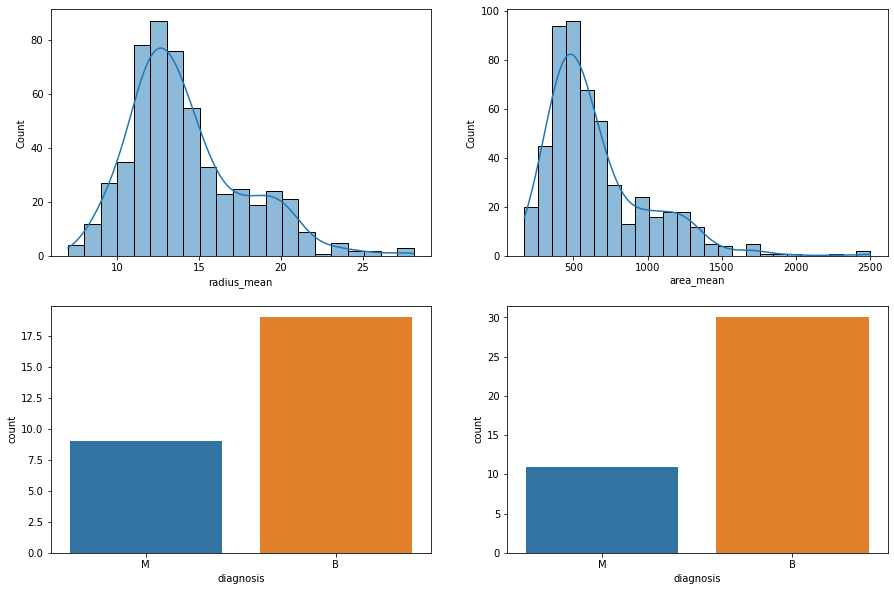

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.histplot(df['radius_mean'], kde=True, ax=axs[0][0]);
sns.histplot(df['area_mean'], kde=True, ax=axs[0][1]);
sns.countplot(x=df['diagnosis'][df.radius_mean.isnull()], ax=axs[1][0]);
sns.countplot(x=df['diagnosis'][df.area_mean.isnull()], ax=axs[1][1]);

Both features with missing values have a positively skewed distribution. Imputing the missing values with the mode value of the corresponding columns is a good option. But, since the missing data exceeds 5% of the total values in the column, Im planning to use K-nearest neighbor Imputer. As this is a distance-based imputation method, we should normalize our data before applying the imputation. Before that, lets see if any records have both the features missing.

In [10]:
any(df['area_mean'].isnull() == df['radius_mean'])

False

# Distribution of values for all the features
There are no rows with both the features missing. Now, lets look into the distribution of all the features in the dataset.

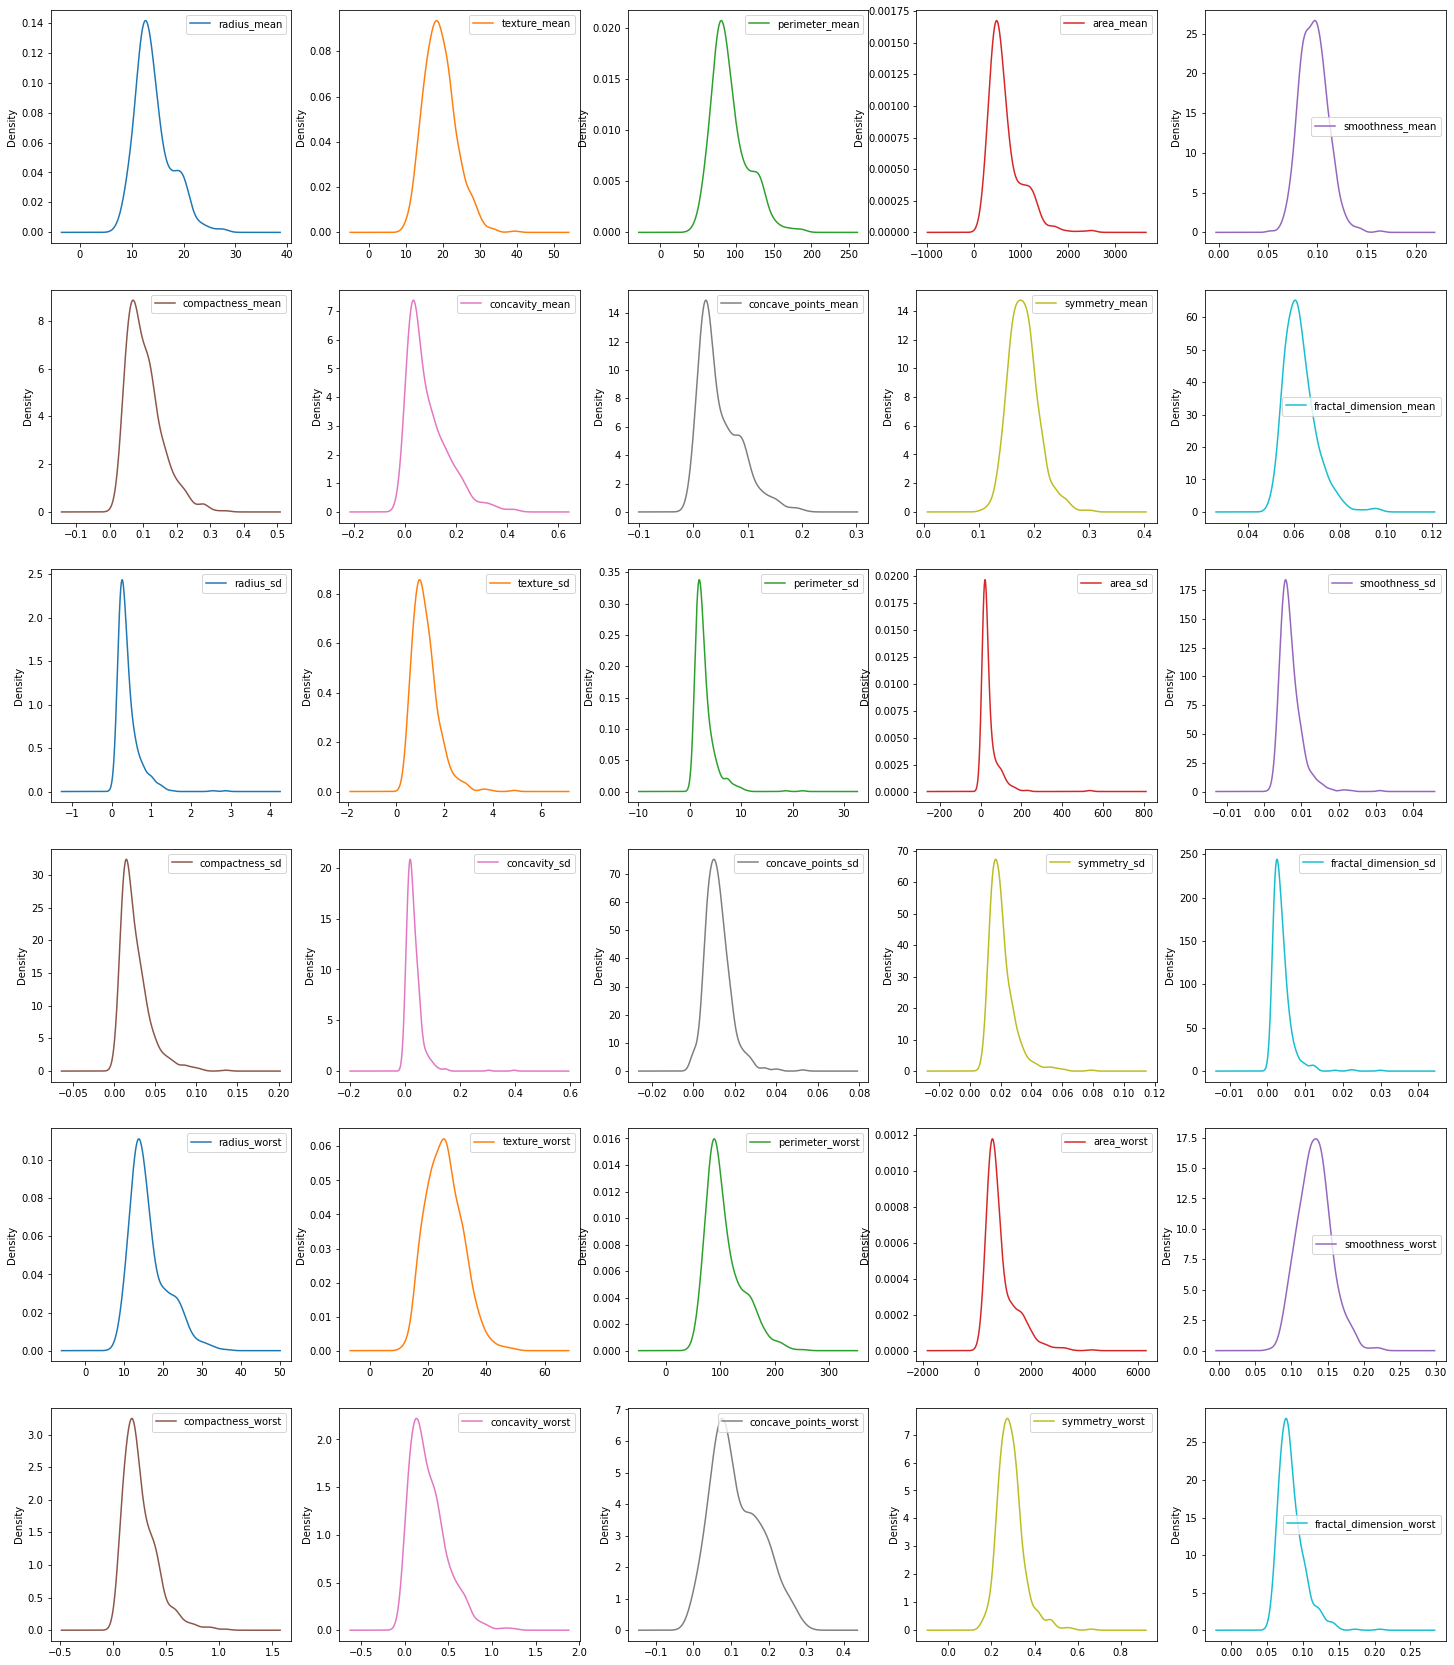

In [11]:
df.iloc[:,2:].plot(kind="density", figsize=(25,30), subplots=True, layout=(6, 5), sharex=False);

# Normalization and Imputation
From the above plot, we can see that most of the features except have a positively skewed Normal distribution. Features like 'smoothness_worst', 'symmetry_worst', 'texture_worst', 'smoothness_mean', 'symmetry_mean', 'texture_mean' have close to normal distributions. Features like 'concave_points_worst', 'radius_mean', 'perimeter_mean', 'concave_points_mean' have clear positive skew and are partially bimodal.

'area_sd' has high kurtosis with the least possibility of outliers. The 'concave_points_worst' feature has fat tails.

We will next perform scaling of the dataset since the ranges of the Features are different. I feel min-max scaling is not suitable for this dataset, because, the general positive skew in the dataset will lead to outliers which are better handled by z-score normalization. Scaling is absolutely neccessary when working with distance-based machine learning methods to prevent biases from Features having relatively high numerical values. Unscaled data will lead to biases and wrong weights being assigned to Features. Imputation of data should also be done using KNNImputer, only after scaling the data.

In [12]:

# Normalization is done here. Scaling brings all features within the range of 0 - 1, whereas Normalization tries to bring the data 
# to a standard normal distribution.
scaler = StandardScaler()
norm_df = scaler.fit_transform(df.iloc[:,2:])

# Imputation with uniform weights for Neighbors
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imp_df = pd.DataFrame(imputer.fit_transform(norm_df), columns=df.columns[2:])

# Check again for any missing values. The sum of column-wise sum of missing values should be 0 now.
print(imp_df.isnull().sum().sum())

0


In [13]:
imp_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-0.012787,1.049736e-16,-1.272171e-16,-0.009333,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,1.957036e-16,5.073075e-16,...,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16
std,0.993497,1.000880e+00,1.000880e+00,0.995963,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.041494,-2.229249e+00,-1.984504e+00,-1.393096,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-0.699588,-7.259631e-01,-6.919555e-01,-0.671940,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-0.237057,-1.046362e-01,-2.359800e-01,-0.322184,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,0.455320,5.841756e-01,4.996769e-01,0.350554,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.954095,4.651889e+00,3.976130e+00,5.244851,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Looking at the dataset now after Scaling and Imputation shows the changes. The Features have been scaled down to a manageable range.

For n_clusters=2, The Silhouette Coefficient is 0.23592801842860464
For n_clusters=3, The Silhouette Coefficient is 0.2782689964328461
For n_clusters=4, The Silhouette Coefficient is 0.28526867485598284
For n_clusters=5, The Silhouette Coefficient is 0.24519002996477346
For n_clusters=6, The Silhouette Coefficient is 0.2630835096949559
For n_clusters=7, The Silhouette Coefficient is 0.324802579938605
For n_clusters=8, The Silhouette Coefficient is 0.3294994983014844
For n_clusters=9, The Silhouette Coefficient is 0.3517548636356364
For n_clusters=10, The Silhouette Coefficient is 0.34868551044293455
For n_clusters=11, The Silhouette Coefficient is 0.3684135293119104
For n_clusters=12, The Silhouette Coefficient is 0.33504046272821975
For n_clusters=13, The Silhouette Coefficient is 0.32600592087597074
For n_clusters=14, The Silhouette Coefficient is 0.3149540115910482
For n_clusters=15, The Silhouette Coefficient is 0.2956297941473691
For n_clusters=16, The Silhouette Coefficient is 0.

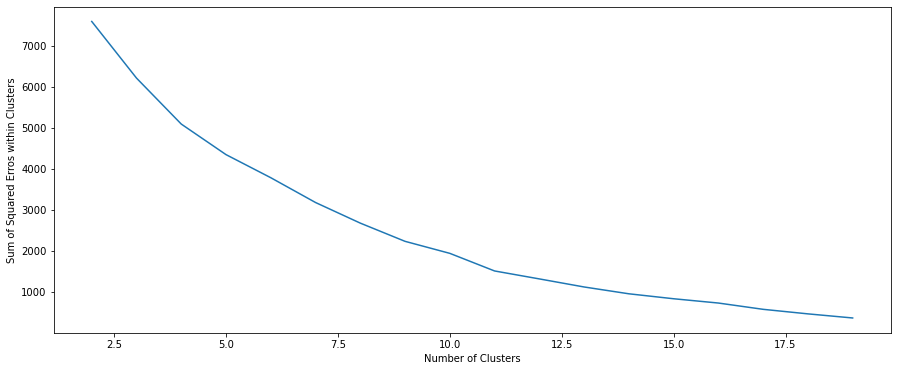

In [14]:
# HEATMAP

# First we need to identify the ideal number of cluster to use for clustering the features. 
# Lets use the Elbow Method and silhouette coefficient for this purpose.
errors = dict()
for k in range(2, 20):
    model = KMeans(n_clusters=k, max_iter=1000).fit(imp_df.T)
    errors[k] = model.inertia_
    label = model.labels_
    sil_coeff = silhouette_score(imp_df.T, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

plt.figure()
plt.plot(errors.keys(), errors.values());
plt.xlabel("Number of Clusters");
plt.ylabel("Sum of Squared Erros within Clusters");

Looks like nine clusters would be ideal for our clustering. However, looking at the similar naming of features, it is evident that there are 10 features that have been used to build to 30 using feature engineering. Hence, I am using 10 clusters here. Also, 10 clusters have the second highest Silhouette score.

In [15]:
# K-means clustering of our Features
kmeans = KMeans(n_clusters=10, max_iter=1000).fit(imp_df.T)

# preparing the dataframe for Heatmap
heat_df = imp_df.T
# Sort the Features in rows by their cluster number
heat_df['cluster'] = kmeans.labels_
heat_df = heat_df.sort_values(by=["cluster"])
heat_df

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,cluster
smoothness_worst,1.307686,-0.375612,0.527407,3.394275,0.220556,2.048513,0.518640,1.447961,1.662757,2.320295,...,-0.362461,-1.740223,0.409050,0.365215,0.378365,-0.691230,-0.809587,1.430427,-1.859019,0
smoothness_mean,1.568466,-0.826962,0.942210,3.283553,0.280372,2.237421,-0.123136,1.604049,2.201839,1.582699,...,0.208495,-1.556408,0.600616,0.963560,1.041842,0.102458,-0.840484,1.525767,-3.112085,0
area_sd,2.487578,0.742402,1.181336,-0.288378,1.190357,-0.289258,0.298627,0.233722,-0.352403,-0.360764,...,-0.230954,-0.385626,-0.389146,1.726318,2.604187,1.291565,0.180698,1.009503,-0.466152,1
perimeter_sd,2.833031,0.263327,0.850928,0.286593,1.273189,-0.321304,0.155410,0.490051,-0.227743,-0.409420,...,0.010861,-0.408430,-0.249525,2.916691,2.379583,1.156857,0.276693,1.438530,-0.157449,1
radius_sd,2.489734,0.499255,1.228676,0.326373,1.270543,-0.255070,0.149883,0.643623,-0.356850,-0.388250,...,-0.146794,-0.328698,-0.523235,2.010431,2.782080,1.300499,0.184892,1.157935,-0.070279,1
texture_mean,-2.073335,-0.353632,0.456187,0.253732,-1.151816,-0.835335,0.160649,0.358450,0.588830,1.105439,...,1.829157,2.345765,2.636649,1.349781,0.721473,2.085134,2.045574,2.336457,1.221792,2
texture_worst,-1.359293,-0.369203,-0.023974,0.133984,-1.466770,-0.313836,0.322883,0.401048,0.822813,2.443109,...,1.220152,2.055541,2.786709,0.607860,0.117700,2.047399,1.374854,2.237926,0.764190,2
concave_points_sd,0.660820,0.260162,1.424827,1.115007,1.144205,-0.069124,-0.228089,0.435349,0.075243,0.409395,...,0.724082,-1.913447,0.694884,2.342934,2.067178,0.808431,0.612157,0.785721,-1.913447,3
concavity_sd,0.724026,-0.440780,0.213076,0.819518,0.828471,0.160025,-0.310141,-0.232554,0.120568,1.509848,...,-0.370819,-1.057501,1.382525,1.543668,0.666001,0.252202,0.510827,1.302285,-1.057501,3
compactness_sd,1.316862,-0.692926,0.814974,2.744280,-0.048520,0.445544,-0.651568,0.268933,0.533290,2.609587,...,0.072760,-0.927774,1.283328,0.984878,0.191805,-0.069758,0.661277,2.017716,-1.163516,3


In [16]:
# Drop the cluster information
heat_df.drop('cluster', axis=1, inplace = True)

# Sort the colum observations by diagnosis
heat_df.loc['diagnosis'] = df.diagnosis
heat_df = heat_df.sort_values(by=["diagnosis"], axis = 1)
heat_df.columns = heat_df.loc['diagnosis']
heat_df.drop('diagnosis', inplace = True)
heat_df

diagnosis,B,B,B,B,B,B,B,B,B,B,...,M,M,M,M,M,M,M,M,M,M
smoothness_worst,-1.451345,-0.866574,0.194255,-0.485202,0.062747,-0.112597,-0.805204,-1.728826,0.040829,-1.353152,...,0.172337,-0.130131,0.400283,-0.577257,1.044671,0.268776,3.771263,-0.042459,0.382749,1.307686
smoothness_mean,-1.293808,-1.190618,-0.28824,-1.209121,0.035563,0.028446,-0.750104,-1.56566,0.323071,-0.955772,...,-0.179357,0.707364,0.075415,0.266139,-0.135234,0.906628,1.796196,0.060471,1.447485,1.568466
area_sd,-0.375065,-0.497614,-0.478913,-0.596622,-0.148667,-0.507735,-0.425889,-0.264836,-0.216873,-0.223473,...,4.043098,1.977138,0.113593,-0.028098,0.807087,-0.343602,-0.579681,0.742402,1.35449,2.487578
perimeter_sd,-0.25695,-0.756436,-0.4911,-0.905935,-0.258435,-0.658915,-0.414865,-0.265861,0.198478,0.698459,...,2.409285,2.324139,0.052444,-0.227248,0.620244,-0.289622,-0.567829,0.825187,2.748876,2.833031
radius_sd,-0.410988,-0.818829,-0.550304,-0.890652,-0.23919,-0.663633,-0.516377,-0.195157,0.370767,0.479765,...,2.893965,2.175733,0.09394,-0.230167,0.752621,-0.308487,-0.699364,1.081781,3.215185,2.489734
texture_mean,-0.835335,-1.414775,-0.295456,-0.544452,-0.232625,-0.104636,0.530653,-0.28382,-0.225644,-0.884204,...,-0.47464,0.607446,0.930909,-0.974959,-0.451369,-0.630553,-0.106963,-0.288475,-0.400174,-2.073335
texture_worst,-0.974982,-1.619844,-0.266612,-0.647666,-0.037002,0.050934,0.573662,-0.764914,-0.107025,-1.299041,...,0.124213,0.019993,0.871666,-0.624868,-0.408286,0.114443,1.163157,-0.066314,-0.691634,-1.359293
concave_points_sd,0.964152,-0.428418,-0.763868,-1.02389,-0.237822,-0.291837,-0.875468,-1.326735,-0.848541,0.52943,...,0.028202,0.472657,0.772745,0.265028,0.084976,1.076077,0.25854,-0.020461,2.630045,0.66082
concavity_sd,1.570857,-0.543235,-0.39436,-0.576392,-0.450064,-0.55053,-0.462332,-1.03121,-0.278974,0.008166,...,-0.362529,0.128194,0.955794,0.082106,-0.168561,0.483969,0.463744,-0.040575,1.123237,0.724026
compactness_sd,0.789823,-0.594002,-0.648215,-0.725342,-0.415155,-0.50402,-0.28102,-1.161672,-0.921962,0.196276,...,-0.80247,0.152682,0.765232,0.071084,-0.364855,0.606506,1.118454,-0.340822,0.520995,1.316862


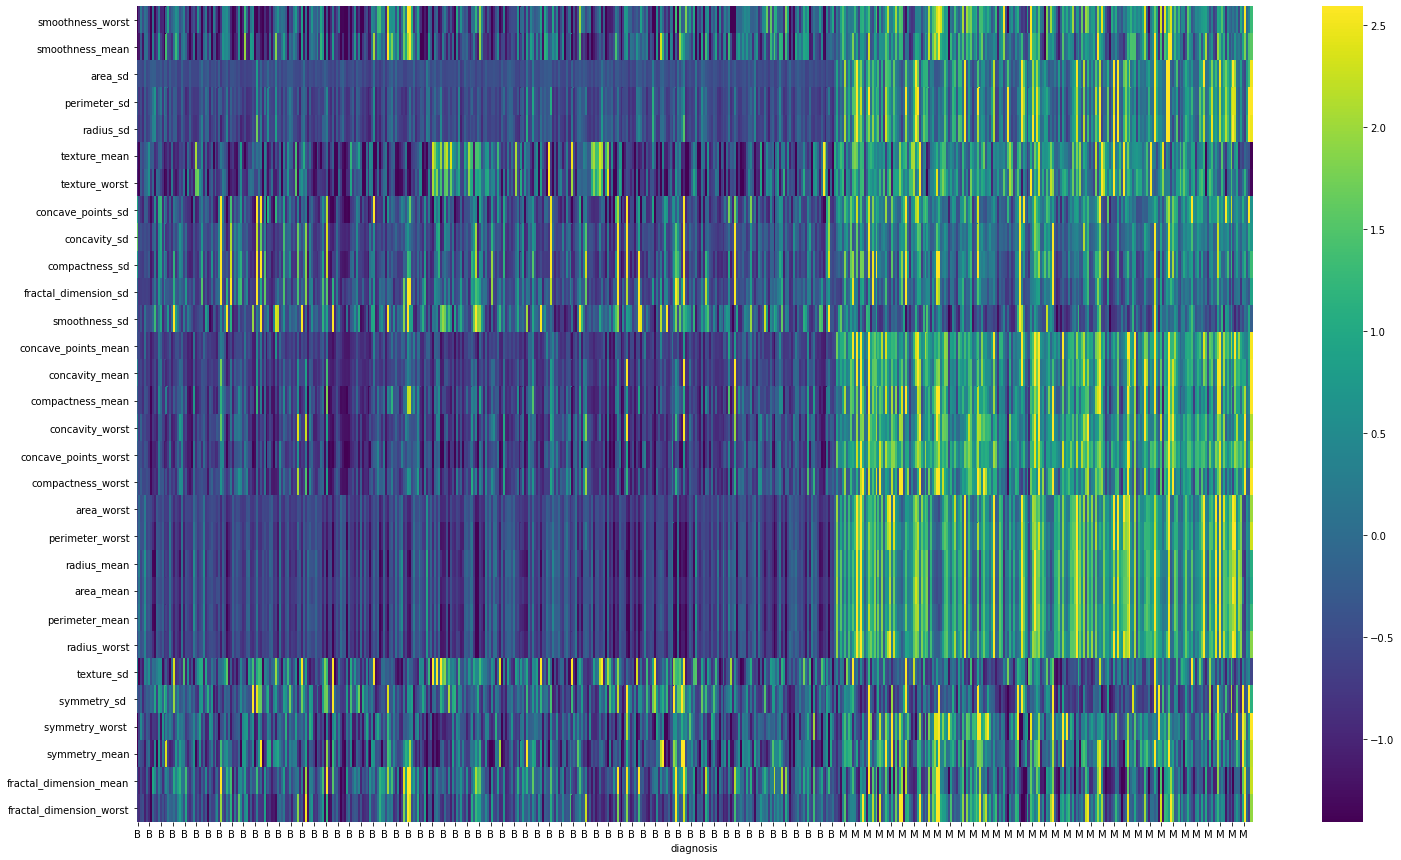

In [17]:
# Plotting the Heatmap
plt.figure(figsize = (25,15))
sns.heatmap(heat_df.astype(float), cmap='viridis', robust = True);

# Data Insights from the Heatmap
The Malignant samples generally have high values for the features than the Benign samples as evident by the color changes in the Heatmap. Certain features like radius_sd, perimeter_sd, area_sd seem to be highly correlated. High correlation is also seen among the following features:
- radius_mean
- area_worst
- perimeter_mean
- area_mean
- perimeter_worst
- radius_worst

Clusering the Features helped us to identify this.  These correlated features also seem to have similar distributions as seen from our Feature-wise distribution plot before. Lets now see the distribution of Features across the two classes of Cancer.

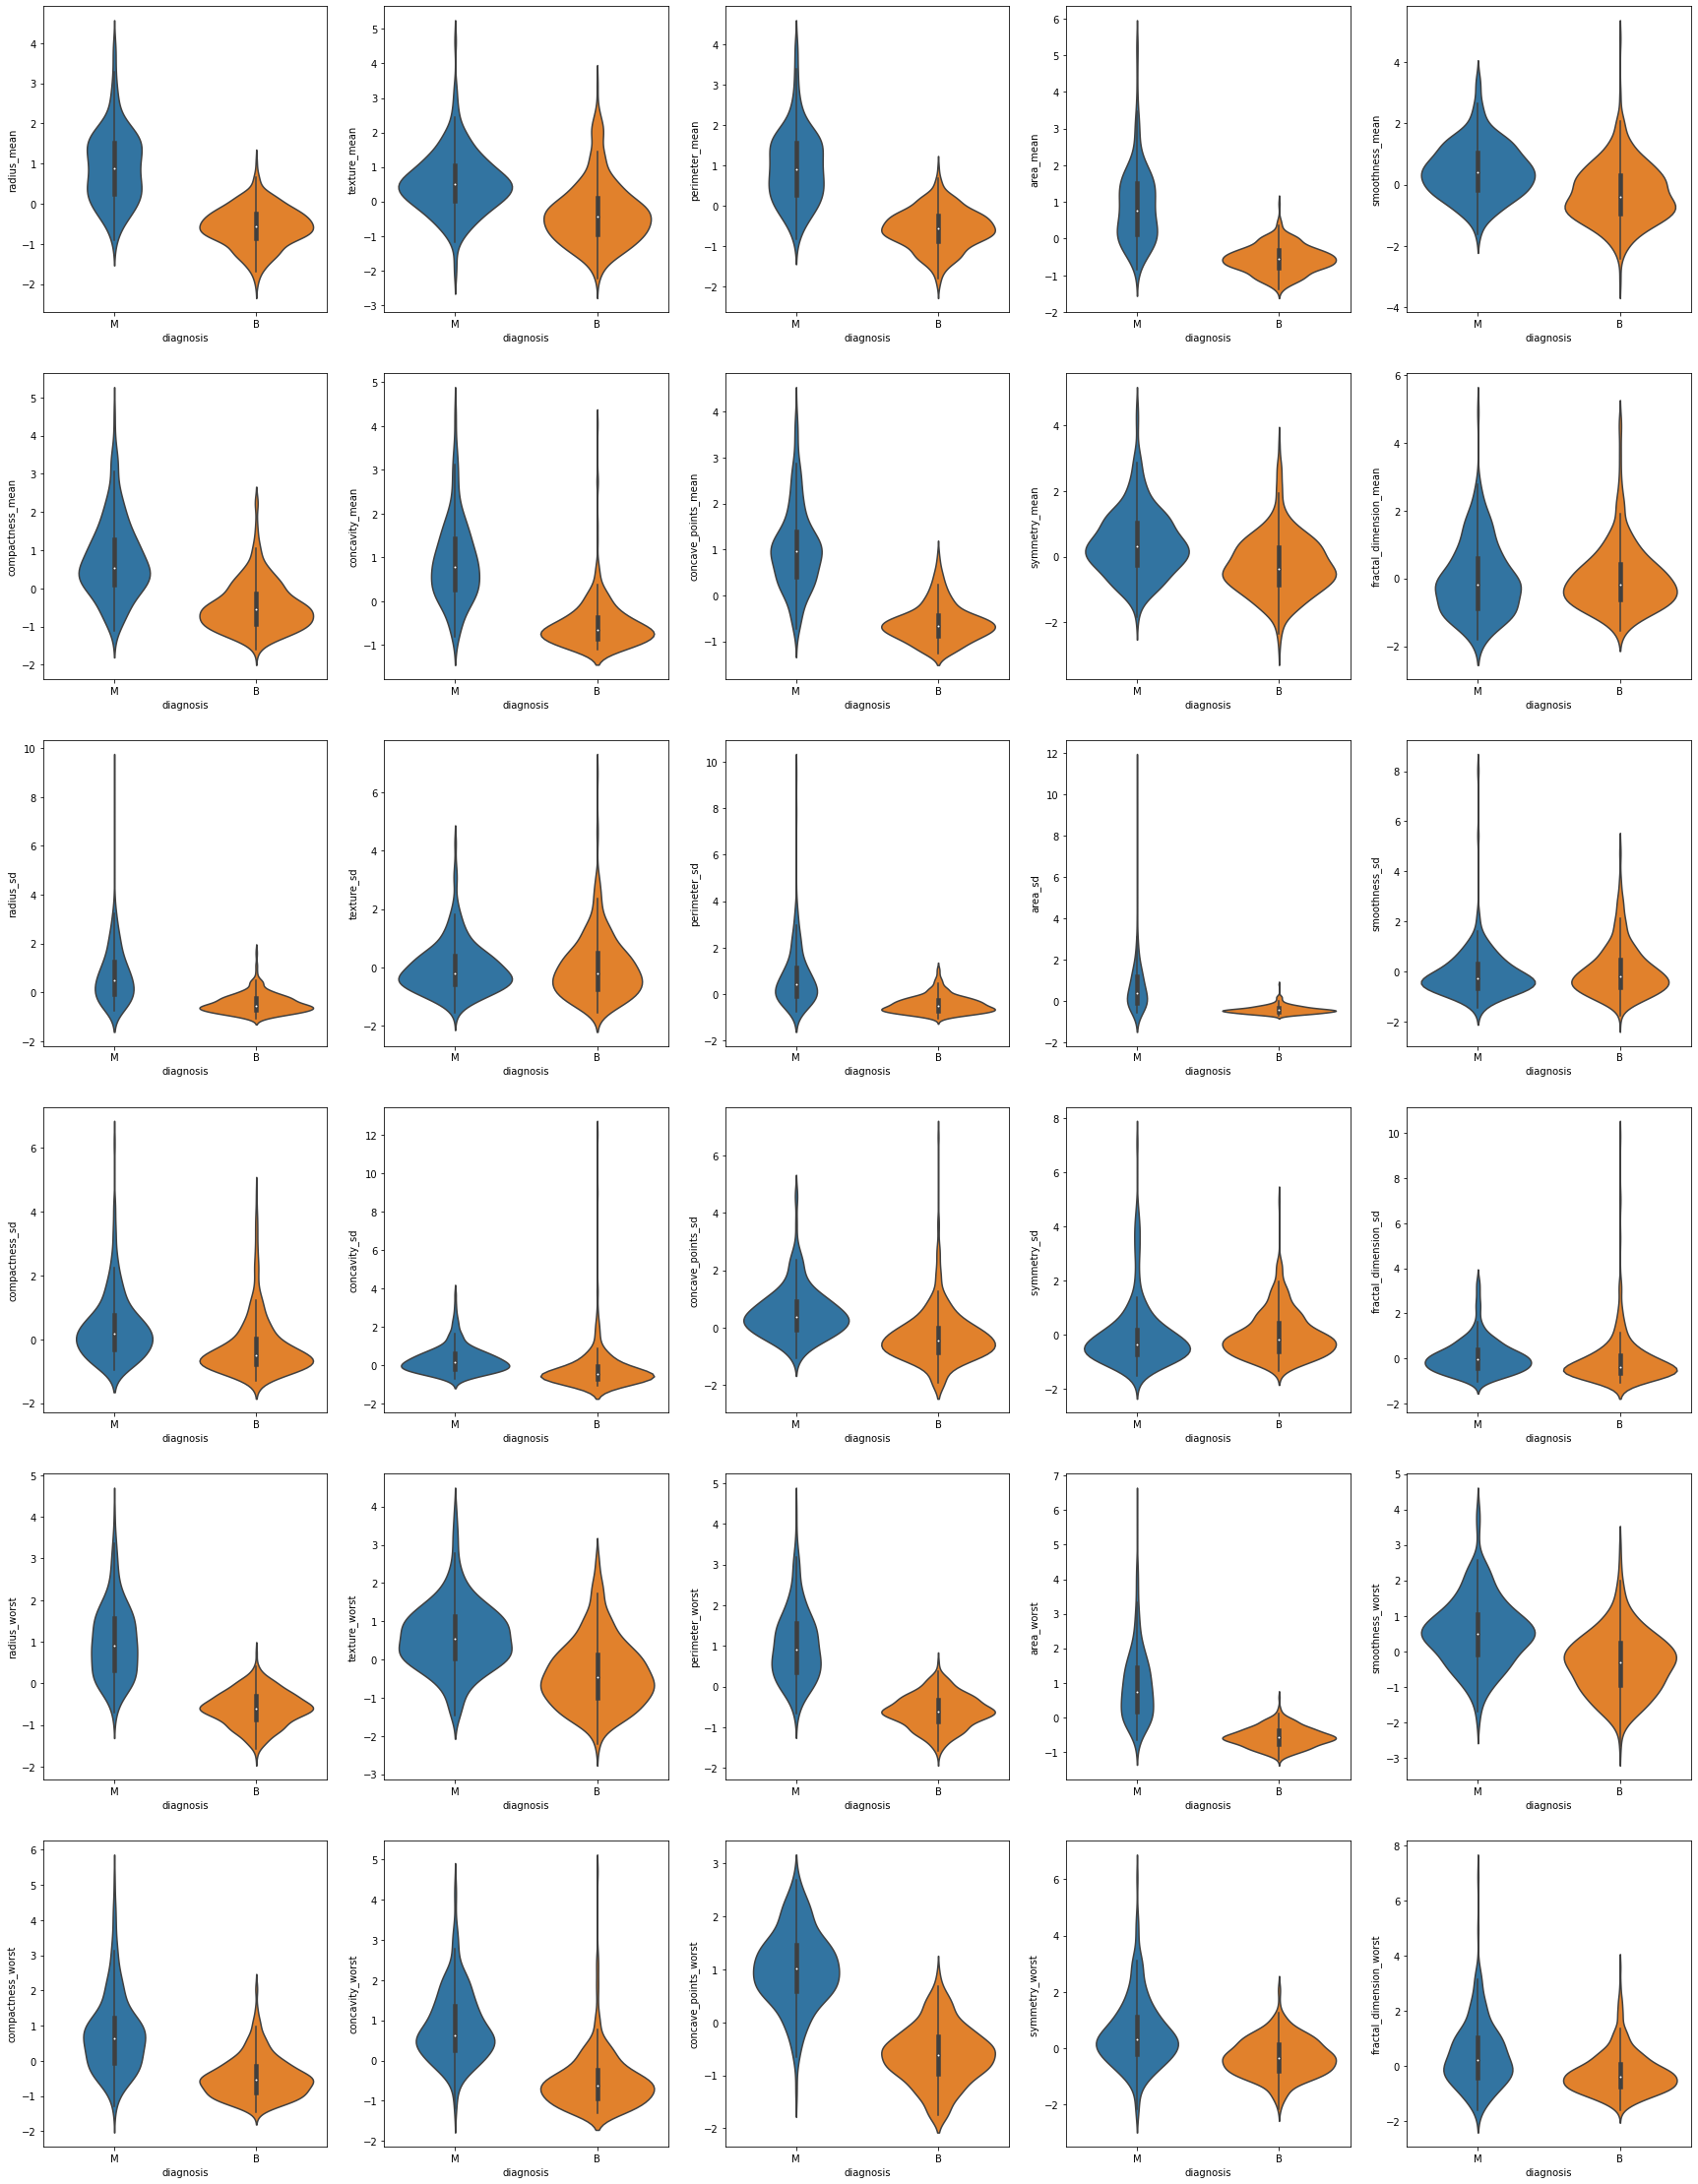

In [18]:
# Violinplot of Features for the two distinct classes
ind = 0
fig, axs = plt.subplots(ncols = 5, nrows = 6, figsize = (30,40))
for i in range(6):
    for j in range(5):
        sns.violinplot(x = df.diagnosis, y = imp_df.iloc[:,ind], data = imp_df, ax = axs[i][j]);
        ind += 1

# Discriminating Features
From the above plot, we can easily see the difference in the distribution of the Features within the Malignant and Benign classes. Based on the visual inspection of the above plot, the following features are better suited for discriminating the Malignant and Benign classes:

* perimeter_worst   
* concave_points_mean
* concave_points_worst
* radius_worst
* area_worst

Lets now test our Features with Hypothesis testing to determine if the difference between the means of the two calsses of are significant.

In [19]:
# Create a table of two-sample t-test results for the features
p_val = []
t_val = []
for column in imp_df.columns:
    m = imp_df[column][df.diagnosis == 'M']
    b = imp_df[column][df.diagnosis == 'B']
    t, p = stats.ttest_ind(b, m)
    #p = float("{:.8f}".format(p))
    p_val.append(p)
    t_val.append(t)

ttest = pd.DataFrame({"feature_name" : imp_df.columns, "t_statistic" : t_val, "p_value" : p_val}).sort_values('p_value')
ttest

    

,feature_name,t_statistic,p_value
27,concave_points_worst,-31.054555,1.969100e-124
22,perimeter_worst,-29.965717,5.771397e-119
7,concave_points_mean,-29.354319,7.101150e-116
20,radius_worst,-29.339082,8.482292e-116
2,perimeter_mean,-26.405213,8.436251e-101
23,area_worst,-25.721590,2.828848e-97
0,radius_mean,-25.525746,2.904440e-96
3,area_mean,-24.254504,1.095547e-89
6,concavity_mean,-23.103963,9.966556e-84
26,concavity_worst,-20.897175,2.464664e-72


In [20]:
# Check how many features have different means between Malignant and Benign classes at 5% significance 
alpha = 0.05
sum(ttest.p_value < alpha)

25

# Two-sample t-test without any correction
The t-test results above show that 25 features out of 30 have unequal means at 5% significance between the two classes compared. This means that most features differ between the two classes significantly. This uncorrected t-test however, assumes no correlation between the features. We saw some clear correlations between features in the Heatmap. So, we need to apply Hypothesis testing corrections on these results. Uncorrected t-tests are known to give a lot of false-positives or Type-I errors (rejecting the null hypothesis that the means of the two samples are not significantly different, even when it is actually correct) when multiple tests are performed.

However, 4 of the top 5 features when ordered by the ascending order of raw p-values, match with results from visual inspection. I missed the 'perimeter_mean' feature due to my tiny plots which made it difficult to visually compare the features :)

In [21]:
# Calculating the Probability of Type I error for our hypothesis testing

# Significance level is 5%
alpha = 0.05

# Probability of not obtaining a significant result when the Null Hypothesis is true at 5% significance
prob_null = 1 - alpha

# Probability of not obtaining any significant result across all 30 tests at 5% significance
prob_null_30 = prob_null ** 30

# Probability of incorrectly obtaining atleast one significant result at 5% significance
prob_type1 = 1 - prob_null_30

print("Probability of atleast one significant feature due to chance: {}".format(prob_type1))

Probability of atleast one significant feature due to chance: 0.7853612360570628


The probability calculation above shows how the high probability of occurence of atleast one Type I error or false positive (Null hypothesis rejection) in hypothesis testing. Generally, this probability increases as the number of tests also increase, at the same significance level.

In [22]:
# Applying Bonferroni correction on the raw p-values
bonferroni_p = multipletests(ttest.p_value, alpha = 0.05, method = 'bonferroni')
ttest['bonferroni_p'] = bonferroni_p[1]
ttest


,feature_name,t_statistic,p_value,bonferroni_p
27,concave_points_worst,-31.054555,1.969100e-124,5.907299e-123
22,perimeter_worst,-29.965717,5.771397e-119,1.731419e-117
7,concave_points_mean,-29.354319,7.101150e-116,2.130345e-114
20,radius_worst,-29.339082,8.482292e-116,2.544688e-114
2,perimeter_mean,-26.405213,8.436251e-101,2.530875e-99
23,area_worst,-25.721590,2.828848e-97,8.486543e-96
0,radius_mean,-25.525746,2.904440e-96,8.713320e-95
3,area_mean,-24.254504,1.095547e-89,3.286640e-88
6,concavity_mean,-23.103963,9.966556e-84,2.989967e-82
26,concavity_worst,-20.897175,2.464664e-72,7.393992e-71


In [23]:
# Applying Benjamini Hockberg correction on the raw p-values
bh_p = multipletests(ttest.p_value, alpha = 0.05, method = 'fdr_bh')
ttest['bh_p'] = bh_p[1]
ttest

,feature_name,t_statistic,p_value,bonferroni_p,bh_p
27,concave_points_worst,-31.054555,1.969100e-124,5.907299e-123,5.907299e-123
22,perimeter_worst,-29.965717,5.771397e-119,1.731419e-117,8.657096e-118
7,concave_points_mean,-29.354319,7.101150e-116,2.130345e-114,6.361719e-115
20,radius_worst,-29.339082,8.482292e-116,2.544688e-114,6.361719e-115
2,perimeter_mean,-26.405213,8.436251e-101,2.530875e-99,5.061751e-100
23,area_worst,-25.721590,2.828848e-97,8.486543e-96,1.414424e-96
0,radius_mean,-25.525746,2.904440e-96,8.713320e-95,1.244760e-95
3,area_mean,-24.254504,1.095547e-89,3.286640e-88,4.108301e-89
6,concavity_mean,-23.103963,9.966556e-84,2.989967e-82,3.322185e-83
26,concavity_worst,-20.897175,2.464664e-72,7.393992e-71,7.393992e-72


Applying the Bonferroni correction and the Benjamini Hochberg correction did not alter the p-values too much. Our top 5 candidate features remain the same even after the p-value corrections. Now lets check the Principle Component Analysis plot of the Features.

In [24]:
# PCA
pca = PCA(n_components=10)
prcmp = pd.DataFrame(pca.fit_transform(imp_df), columns=['PC' + str(n) for n in range(1,11)])
prcmp['class'] = df.diagnosis
prcmp['class'] = prcmp['class'].replace('M', 'Malignant').replace('B', 'Benign')
print(pca.explained_variance_ratio_.cumsum())


[0.44282661 0.63205143 0.72606243 0.7921339  0.84711148 0.8873957
 0.90986842 0.92577575 0.93968961 0.95137335]


# Principal Component Analysis
From the above code snippet, we can see that we need the first 10 Principle Components to explain 95% variance in the dataset. Looking at the PCA plot created below, we can see that the Benign samples have low variance across the two PCs compared to Malignant samples. A linear hyperplane cannot be used to seperate these two classes. The best classifiers for this dataset based on this PCA plot would be tree based classifiers. We can also infer the rules to predict the classification of unforseen data using such classifiers. I am planning to use RandomForestClassifier here.

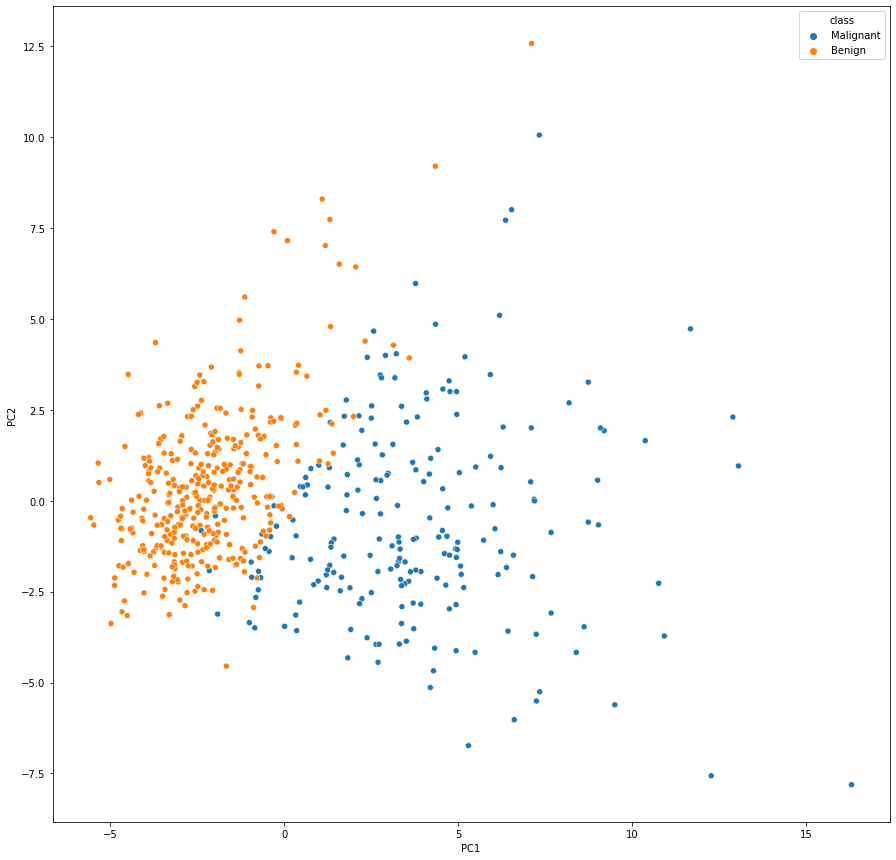

In [25]:
# PCA Plot
plt.figure(figsize = (15, 15))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'class', data = prcmp);

In [26]:
# Predicting the class using the topmost Feature
x = imp_df['concave_points_worst']
y = df.diagnosis.replace('M', 1).replace('B', 0)
thresh = np.linspace(min(x), max(x), 20)
ac = []
pre = []
rec = []
f1 = []

for t in thresh:
    y_pred = x > t
    ac.append(accuracy_score(y, y_pred))
    p, r, f, _ = precision_recall_fscore_support(y, y_pred, zero_division = 0)
    pre.append(p)
    rec.append(r)
    f1.append(f)

single_feature_model = pd.DataFrame({"threshold" : thresh, "accuracy" : ac, "precision" : pre, "recall" : rec, "f1_score" : f1})
single_feature_model
  


,threshold,accuracy,precision,recall,f1_score
0,-1.745063,0.395431,"[1.0, 0.381294964028777]","[0.036414565826330535, 1.0]","[0.07027027027027027, 0.5520833333333334]"
1,-1.511855,0.405975,"[1.0, 0.38545454545454544]","[0.05322128851540616, 1.0]","[0.10106382978723404, 0.5564304461942257]"
2,-1.278648,0.446397,"[0.9772727272727273, 0.40190476190476193]","[0.12044817927170869, 0.9952830188679245]","[0.2144638403990025, 0.5725915875169606]"
3,-1.045441,0.499121,"[0.9864864864864865, 0.4262626262626263]","[0.20448179271708683, 0.9952830188679245]","[0.3387470997679814, 0.596888260254597]"
4,-0.812233,0.588752,"[0.992, 0.4752252252252252]","[0.3473389355742297, 0.9952830188679245]","[0.5145228215767634, 0.6432926829268293]"
5,-0.579026,0.690685,"[0.983957219251337, 0.5471204188481675]","[0.5154061624649859, 0.9858490566037735]","[0.6764705882352942, 0.7037037037037037]"
6,-0.345819,0.806678,"[0.9731800766283525, 0.6655844155844156]","[0.711484593837535, 0.9669811320754716]","[0.8220064724919094, 0.7884615384615384]"
7,-0.112611,0.875220,"[0.9673202614379085, 0.7680608365019012]","[0.8291316526610645, 0.9528301886792453]","[0.8929110105580694, 0.8505263157894737]"
8,0.120596,0.901582,"[0.936231884057971, 0.8482142857142857]","[0.9047619047619048, 0.8962264150943396]","[0.9202279202279202, 0.8715596330275229]"
9,0.353803,0.912127,"[0.9159891598915989, 0.905]","[0.9467787114845938, 0.8537735849056604]","[0.931129476584022, 0.8786407766990291]"


Text(0, 0.5, 'Precision')

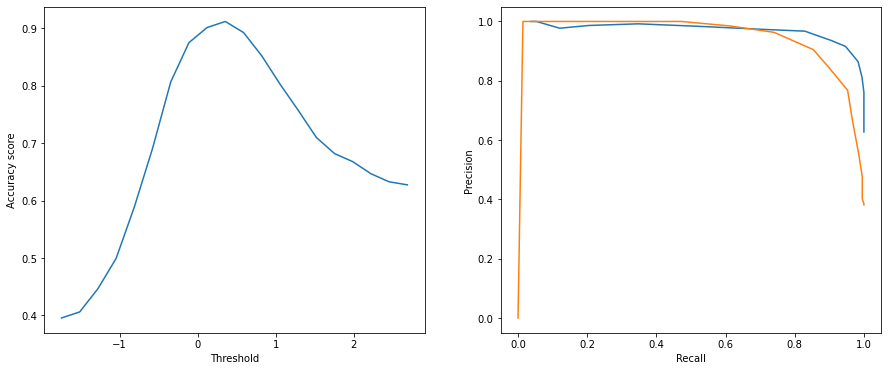

In [27]:
# Accuracy and Precision-Recall Plots
fig, axs = plt.subplots(ncols = 2)
axs[0].plot(thresh, ac)
axs[0].set_xlabel("Threshold")
axs[0].set_ylabel("Accuracy score")

axs[1].plot(rec, pre)
axs[1].set_xlabel("Recall")  
axs[1].set_ylabel("Precision")  

# Single Feature Model
This model seems to perform pretty good at a threshold value close to 0.353 from my results. At this threshold value, the model has an accuracy of 91% and highest f1 score. 

Given a choice between a high precision model and a high recall model, I would always prefer a high recall model in a clinical/healthcare setting. In cases the breast cancer prediction, finding the positive cases matters more than the validity of the results. We can always supplement our results with conformatory tests. Hence finding all the positive samples takes top priority and so a sample with high recall is better in healthcare settings than a sample with high precision. Lets now create an RandomForestClassifier model for this dataset and Wrap Up the analysis.

In [28]:
# RandomForestClassifier Model

# Setting up the data
X = df.iloc[:,2:]
Y = df.diagnosis
le = LabelEncoder()
le.fit(['B', 'M'])
Y = le.transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#Scaling and Imputation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
imputer = KNNImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model initialization
clf = RandomForestClassifier(max_depth=10, random_state = 42);
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [29]:
# Predicting with the model 
Y_pred = clf.predict(X_test)
Y_pred_prob = clf.predict_proba(X_test)
print("Accuracy : ", accuracy_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob[:,1])
print ("Area under Curve: ", auc(fpr, tpr))
p, r, f, _ = precision_recall_fscore_support(Y_test, Y_pred)
print("Precision : ", p[1])
print("Recall", r[1])
print("F1 Score", f[1])

Accuracy :  0.9627659574468085
Area under Curve:  0.9956827433082521
Precision :  0.96875
Recall 0.9253731343283582
F1 Score 0.9465648854961832


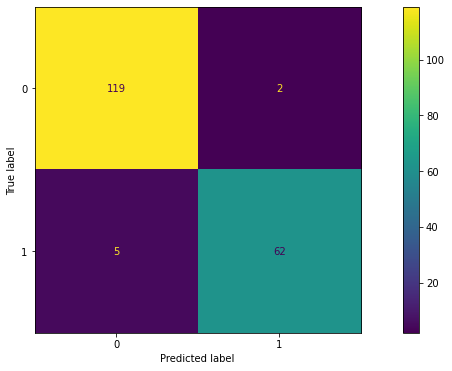

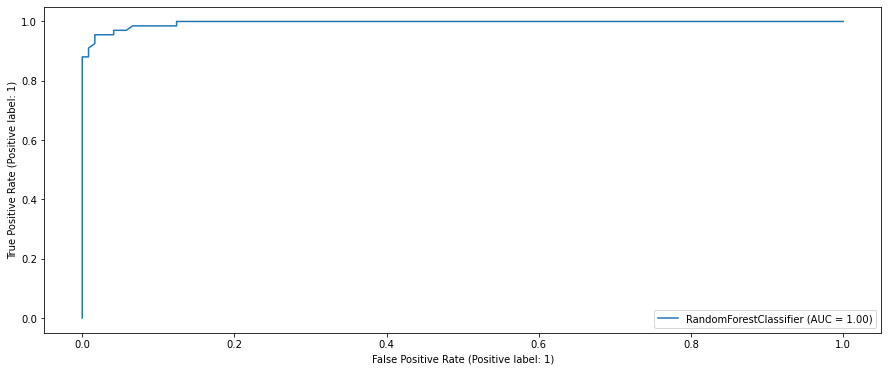

In [30]:
# Confusion Matrix and ROC curve
plot_confusion_matrix(clf, X_test, Y_test);
plot_roc_curve(clf, X_test, Y_test);

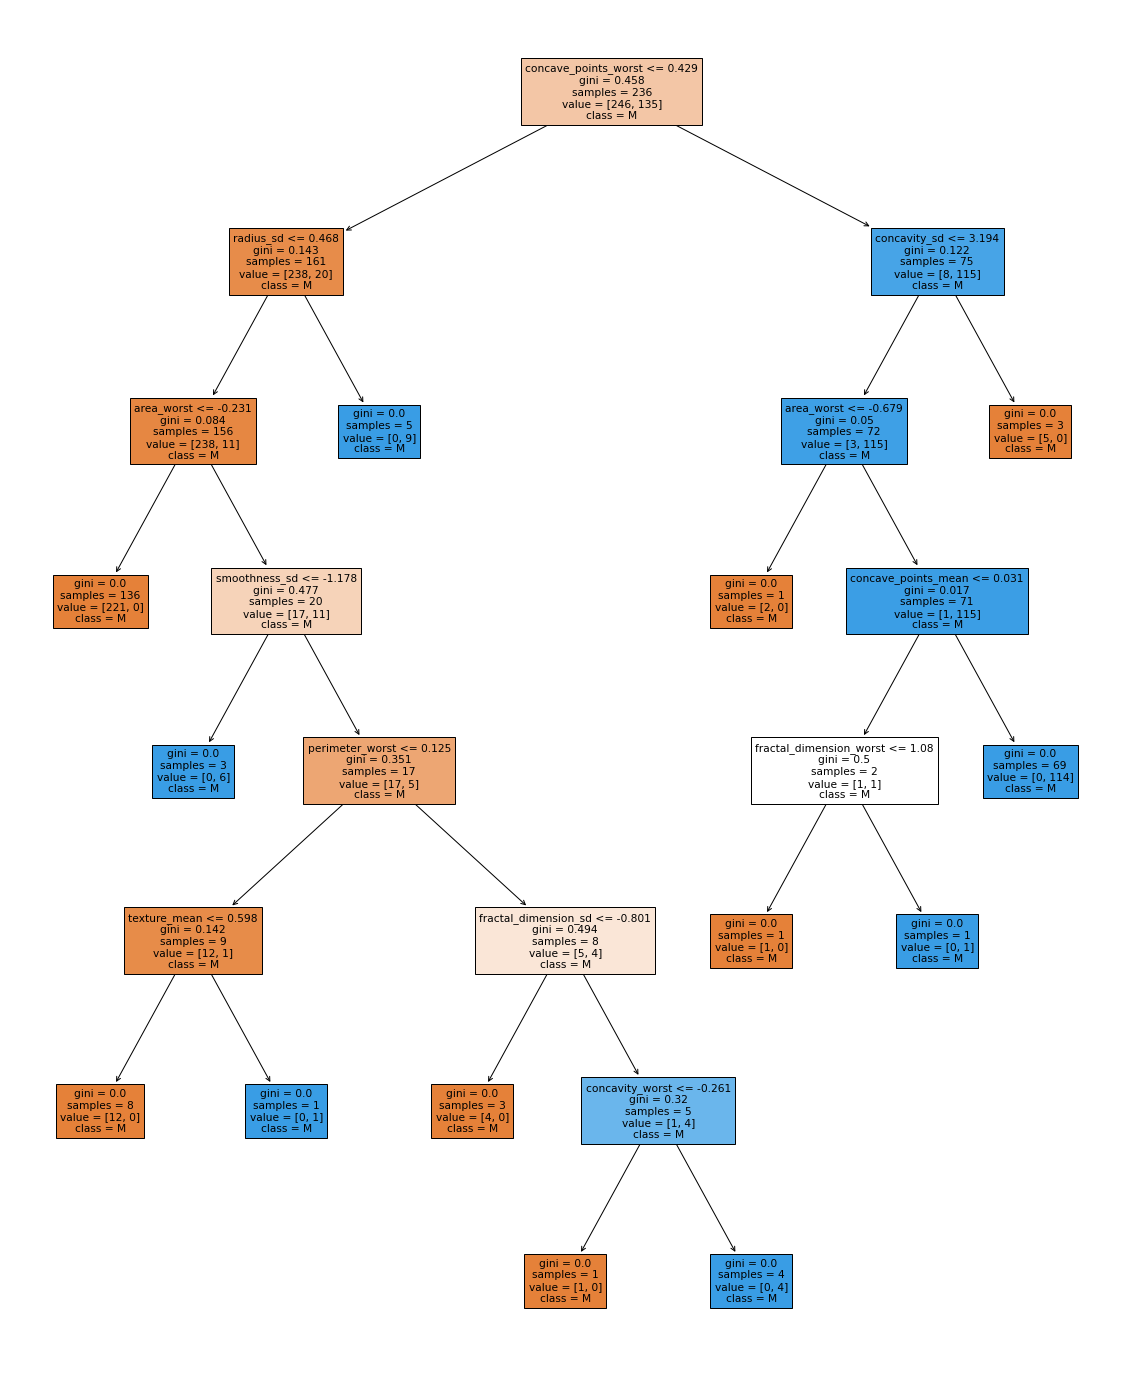

In [33]:
# plotting one of the sub estimators of the random forest
plt.figure(figsize = (20, 25))
tree.plot_tree(clf.estimators_[0], feature_names = imp_df.columns, class_names = df.diagnosis, filled = True);

# Random Forest Model Performance
we can see our random forest classified perform better thatn the single feature model. We are also able to visualize the rules that are used for the classification from the above plot which is one of the advantages of tree-based classifiers. Notice that the rules are based on values of the top features that we got from our Hypothesis Testing Exercise.